In [17]:
import numpy as np

import mne
from mne.datasets import sample

from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs, create_ecg_epochs

# getting some data ready
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

raw = mne.io.read_raw_fif(raw_fname, preload=True)

# apply a 1 Hz highpass filter on the data
raw.filter(1., None, n_jobs=1, fir_design='firwin')
raw.pick_types(meg=False, eeg=True, eog=True)

Opening raw data file /home/kosch/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 497 samples (3.310 sec)



<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 60 x 41700 (277.7 sec), ~22.2 MB, data loaded>

In [18]:
method = 'fastica'

# Choose other parameters
n_components = 25  # if float, select n_components by explained variance of PCA
decim = 3  # we need sufficient statistics, not all time points -> saves time

# we will also set state of the random number generator - ICA is a
# non-deterministic algorithm, but we want to have the same decomposition
# and the same order of components each time this tutorial is run
random_state = 23

In [19]:
ica = ICA(n_components=n_components, method=method, random_state=random_state)
print(ica)

<ICA  |  no decomposition, fit (fastica):  samples, no dimension reduction>


In [20]:
reject = dict(eeg=180e-6, eog=150e-6)
ica.fit(raw, picks='eeg', decim=decim, reject=reject)
print(ica)

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 015']
Artifact detected in [707, 808]
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
Artifact detected in [1515, 1616]
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
Artifact detected in [5656, 5757]
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
Artifact detected in [9393, 9494]
    Rejecting  epoch based on EEG : ['EEG 002']
Artifact detected in [9494, 9595]
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007']
Artifact detected in [10908, 11009]
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
Artifact detected in [13332, 13433]
    Rejecting  epoch based o

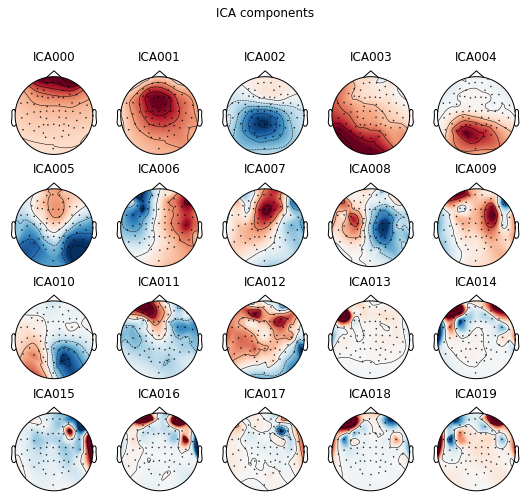

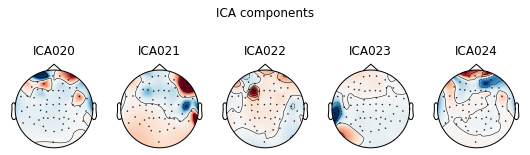

[<Figure size 540x504 with 20 Axes>, <Figure size 540x180 with 5 Axes>]

In [21]:
# plot the ICA components
ica.plot_components()

    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [12642, 12943]
    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [17458, 17759]
Creating RawArray with float64 data, n_channels=376, n_times=40936
Current compensation grade : 0
    Range : 0 ... 40935 =      0.000 ...   272.621 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows


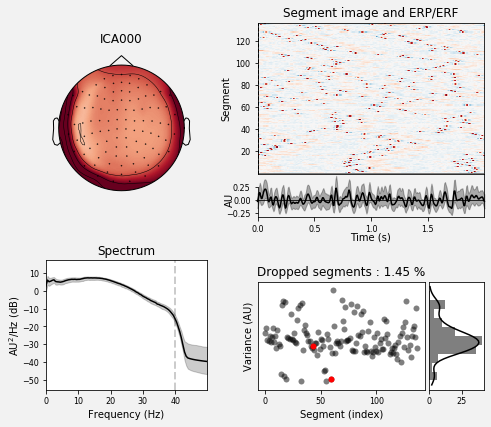

[<Figure size 504x432 with 6 Axes>]

In [7]:
ica.plot_properties(raw, picks=0)

    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [0, 301]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [301, 602]
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 015']
Artifact detected in [2107, 2408]
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
Artifact detected in [4515, 4816]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [4816, 5117]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [6321, 6622]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [6622, 6923]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [7224, 7525]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [8428, 8729]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [8729, 9030]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [9030, 

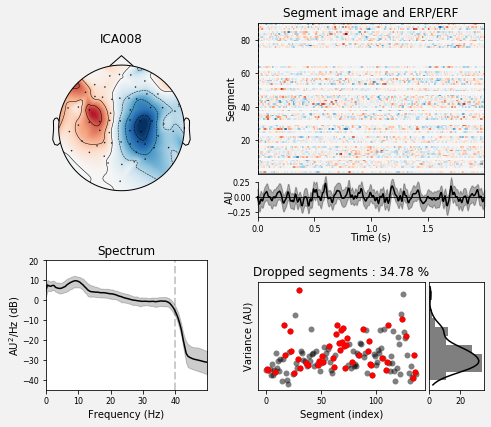

[<Figure size 504x432 with 6 Axes>]

In [24]:
ica.plot_properties(raw, picks=8)

    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [0, 301]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [301, 602]
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 015']
Artifact detected in [2107, 2408]
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
Artifact detected in [4515, 4816]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [4816, 5117]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [6321, 6622]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [6622, 6923]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [7224, 7525]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [8428, 8729]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [8729, 9030]
    Rejecting  epoch based on EOG : ['EOG 061']
Artifact detected in [9030, 

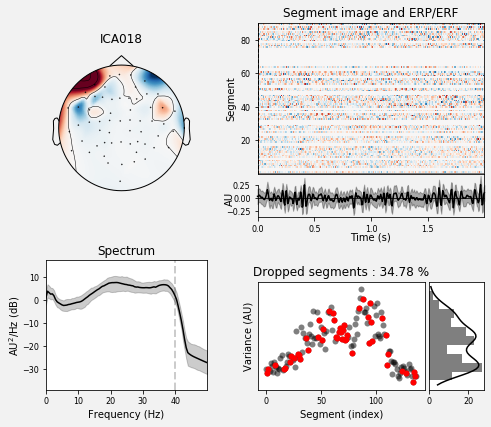

[<Figure size 504x432 with 6 Axes>]

In [23]:
ica.plot_properties(raw, picks=18)